In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train_df = pd.read_csv("titanic/train.csv")
test_df = pd.read_csv("titanic/test.csv")
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df['has_cabin'] = train_df['Cabin'].notna().astype(int)
test_df['has_cabin'] = test_df['Cabin'].notna().astype(int)

train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [8]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())


In [9]:
train_df.shape

(891, 13)

In [11]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
has_cabine       2
has_cabin        2
dtype: int64

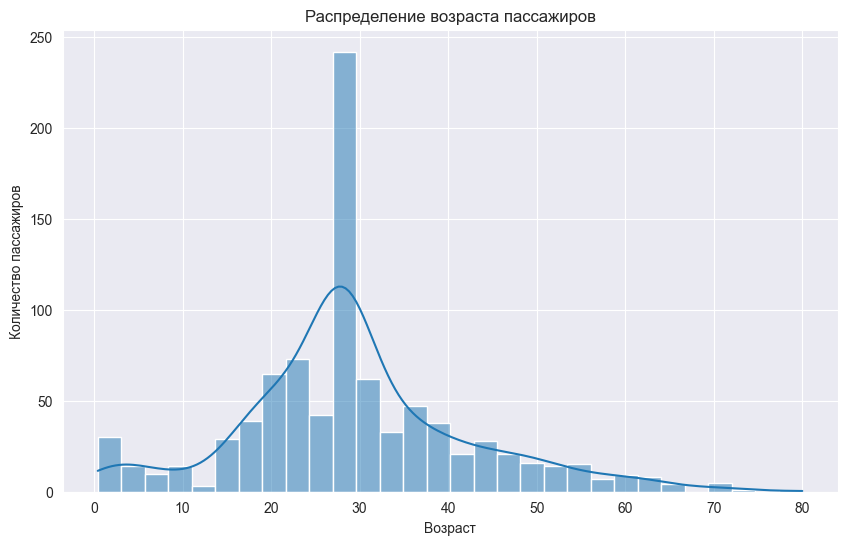

In [12]:
import seaborn as sns


plt.figure(figsize=(10,6))
sns.histplot(train_df["Age"], bins=30, kde=True)
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.show()

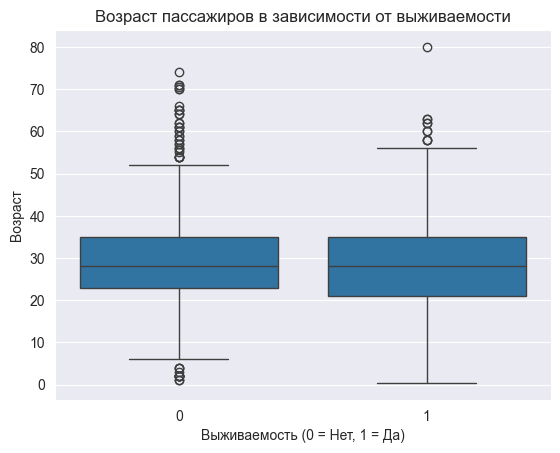

In [13]:
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title("Возраст пассажиров в зависимости от выживаемости")
plt.xlabel("Выживаемость (0 = Нет, 1 = Да)")
plt.ylabel("Возраст")
plt.show()


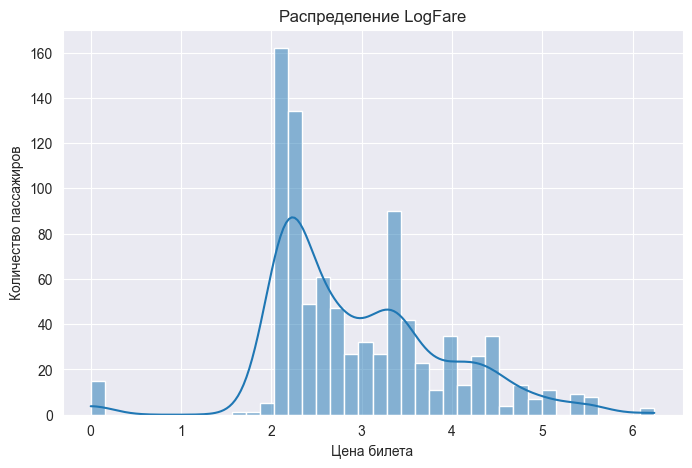

In [15]:
train_df['LogFare'] = train_df['Fare'].apply(lambda x: np.log1p(x))


plt.figure(figsize=(8,5))
sns.histplot(train_df['LogFare'], bins=40, kde=True)
plt.title('Распределение LogFare')
plt.xlabel('Цена билета')
plt.ylabel('Количество пассажиров')
plt.show()


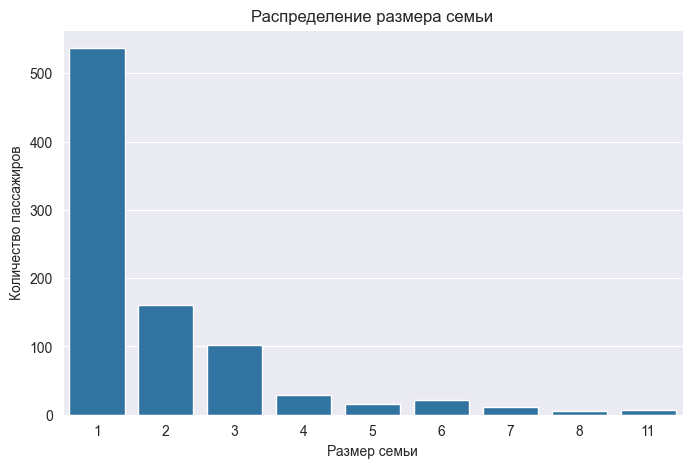

In [16]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

plt.figure(figsize=(8,5))
sns.countplot(x='FamilySize', data=train_df)
plt.title('Распределение размера семьи')
plt.xlabel('Размер семьи')
plt.ylabel('Количество пассажиров')
plt.show()


Text(0.5, 0, 'Пол')

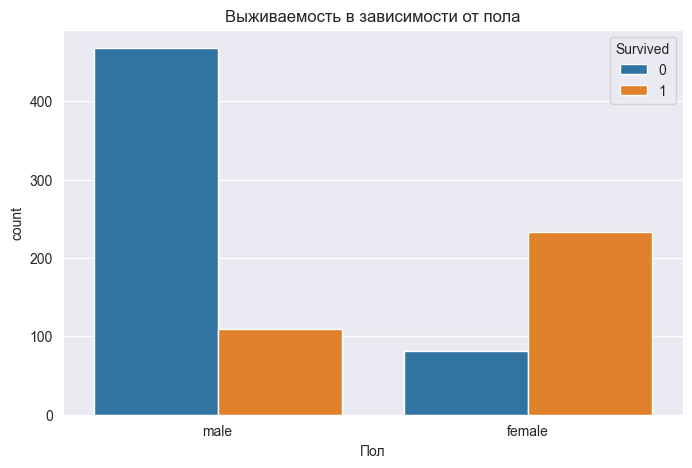

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Выживаемость в зависимости от пола')
plt.xlabel('Пол')

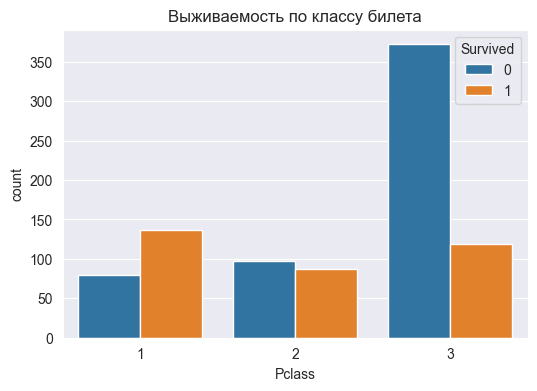

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Выживаемость по классу билета')
plt.show()


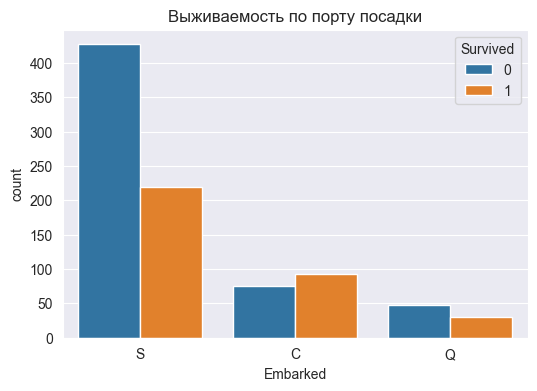

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Выживаемость по порту посадки')
plt.show()


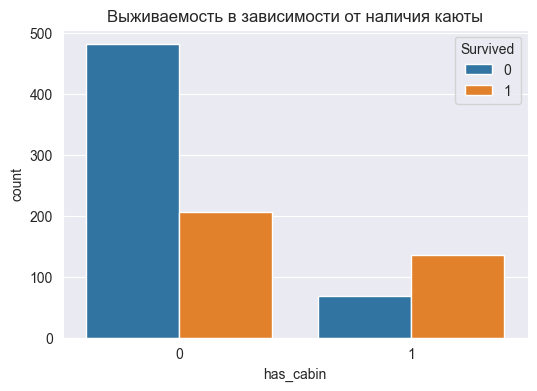

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='has_cabin', hue='Survived', data=train_df)
plt.title('Выживаемость в зависимости от наличия каюты')
plt.show()


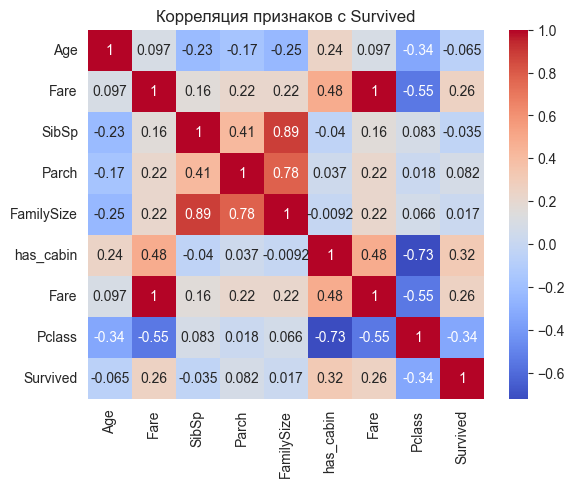

In [23]:
numeric_features = ['Age', 'SibSp', 'Parch', 'FamilySize', 'has_cabin', 'Fare', 'Pclass']
sns.heatmap(train_df[numeric_features + ['Survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция признаков с Survived')
plt.show()


In [24]:
def age_category(age: int) -> str:
    if age < 12:
        return 'Child'
    elif age < 20:
        return 'Teenager'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'
    
train_df['AgeCategory'] = train_df['Age'].apply(age_category)
train_df['Sex'] = train_df['Sex'].map({'male': 0, "female": 1})
train_df = pd.get_dummies(train_df, columns=['Embarked', 'AgeCategory', "Pclass"], drop_first=True)

In [26]:
X = train_df.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = train_df['Survived']


In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')




Accuracy: 0.8324


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Embarked
- Pclass
Feature names seen at fit time, yet now missing:
- AgeCategory_Child
- AgeCategory_Senior
- AgeCategory_Teenager
- Embarked_Q
- Embarked_S
- ...


In [35]:
test_df['AgeCategory'] = test_df['Age'].apply(age_category)
test_df['Sex'] = test_df['Sex'].map({'male': 0, "female": 1})
test_df = pd.get_dummies(test_df, columns=['Embarked', 'AgeCategory', "Pclass"], drop_first=True)

In [36]:
for col in X.columns:
    if col not in test_df.columns:
        test_df[col] = 0
test_df = test_df[X.columns]  #


kaggle_pred = model.predict(test_df)

submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": kaggle_pred
})

submission.to_csv("titanic/kaggle_submission.csv", index=False)
print("Файл kaggle_submission.csv готов для отправки!")

Файл kaggle_submission.csv готов для отправки!
